## Sharing app demo 

demo.launch(share=True)

**Share link**: XXXXX.gradio.app

Share links expire after 72 hours.

## Hosting on HF Spaces

https://huggingface.co/blog/gradio-spaces

## Embedding Hosted Spaces

- Embedding with Web Components

- Embedding with IFrames


## API Page

btn.click(add, [num1, num2], output, **api_name**="addition")

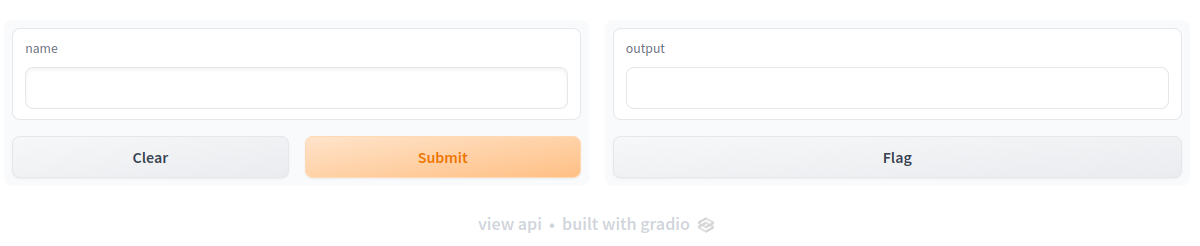

## Authentication

demo.launch(auth=("admin", "pass1234"))

**or**

def same_auth(username, password):

     return username == password
    
demo.launch(auth=same_auth)

## Mounting Within Another FastAPI App

In [ ]:
# File: embedd-gradio-fastapi-test.py
from fastapi import FastAPI
import gradio as gr
import uvicorn
import sys

# Usage: python3 embedd-gradio-fastapi-test.py 0.0.0.0 1234
CUSTOM_PATH = "/gradio"
app = FastAPI()

# homepage
@app.get("/")
def read_main():
    return {"message": "This is your main app"}

# gradio interface
io = gr.Interface(lambda x: "Hello, " + x + "!", "textbox", "textbox")
# create gradio app
gradio_app = gr.routes.App.create_app(io)
# mount gradio app into ./gradio
app.mount(CUSTOM_PATH, gradio_app)


if __name__ == '__main__':
    if len(sys.argv) != 3:
        print('Run `python embedd-gradio-fastapi-test.py <HOST> <PORT>`')
        sys.exit(1)

    host = sys.argv[1]
    port = int(sys.argv[2])

    uvicorn.run('embedd-gradio-fastapi-test:app', host=host, port=port)